## CREDIT CARD FRAUD DETECTION



## Introduction

### In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset.

 
## Our Goals
### -Understand the little distribution of the data that was provided to us. 
### -Over sampling and under sampling of skewed data - performing smote and random forest
### -Feature selection using Gaussian Distribution Model, to check the accuracy
### -Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions with scaled data
### -Determine the Classifiers we are going to use and decide which one has a higher accuracy
### -Create a Neural Network and compare the accuracy to our classifier

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
LABELS = ["Normal", "Fraud"]
import tensorflow as tf

%matplotlib inline


In [2]:
# Create a dataframe for your dataset
data = pd.read_csv("creditcards.csv")

## DATA EXPLORATION
### Summary:

There are no "Null" values, so we don't have to work on ways to replace values.
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

In [3]:
# View your data through your dataframe
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Class Distribution- highly skewed data

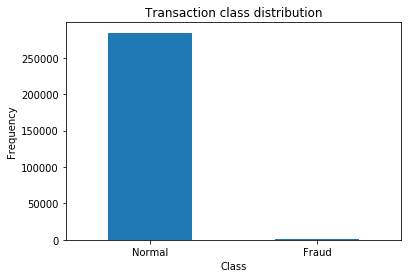

In [5]:
# Exploring the data set based on 'Class' column that acts as a flag to identify fraud and non-fraud transactions
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [6]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


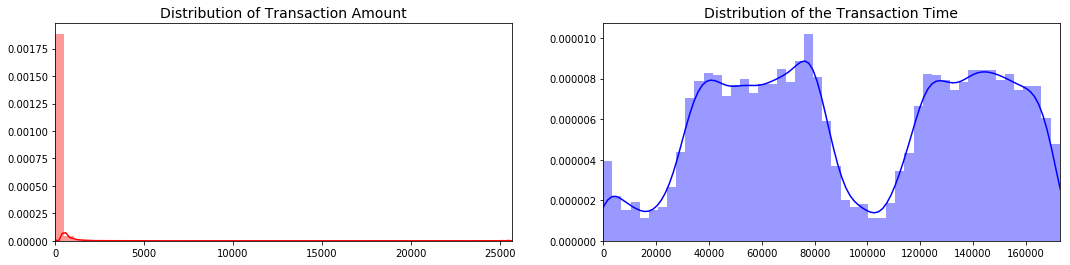

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of the Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

## Logistic Regression on unscaled data, accuracy received 80%

In [8]:
X = data[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Time']]
Y = data['Class']

In [9]:
## Splitting the data into train and test set fot logistic regression 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30,random_state=101)

In [10]:
logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

In [11]:
print(classification_report(y_test,predictR))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.82      0.60      0.69       144

avg / total       1.00      1.00      1.00     85443



In [12]:
print(confusion_matrix(y_test,predictR))

[[85280    19]
 [   58    86]]


In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictR)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.798499738176


Text(0.5,0,'False Positive Rate')

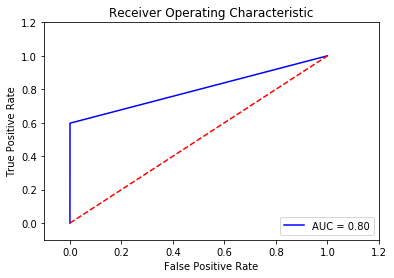

In [14]:
# Plotting the roc curve to get accuracy through logistic regression
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Resampling the dataset
### One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class.
### Another is UNDER-sampling, which deletes instances from the over-represented class.

## Oversampling


In [15]:
columns=data.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=data[features_columns]
labels=data['Class']

In [16]:
#Splitting the feature and labels into train and test dataset
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=0)

## Create from train set a new data set to obtain a balanced data set using SMOTE


In [17]:
#Oversampling of data using SMOTE Method
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [18]:
# verify new data set is balanced
len(os_labels[os_labels==1])

199019

## Perform training of the Random forest using the (over sampled) train set -AUC 90%

In [19]:
#Applying Random Forest on the oversampled dataset
clf=RandomForestClassifier(random_state=0)
clf.fit(os_features,os_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# perform predictions on test set
actual=labels_test
predictions = clf.predict(features_test)

In [21]:
confusion_matrix(actual,predictions)

array([[85278,    18],
       [   29,   118]], dtype=int64)

In [22]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.901255029305


Text(0.5,0,'False Positive Rate')

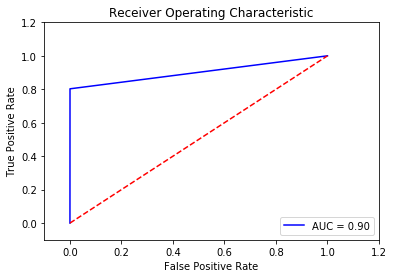

In [23]:
# Plotting the roc curve to get accuracy through Random Forest
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Under Sampling- AUC 93%

In [24]:
## Undersampling data using ILOC method
fraud_record = 492
frauds = np.array(data[data.Class == 1].index)

nonfrauds = data[data.Class == 0].index
random_nonfrauds = np.random.choice(nonfrauds, fraud_record, replace = False)
random_nonfrauds = np.array(random_nonfrauds)
Newsample = np.concatenate([frauds,random_nonfrauds])
CrediUnderSample = data.iloc[Newsample,:]

In [25]:
CrediUnderSample.count()

Time      984
V1        984
V2        984
V3        984
V4        984
V5        984
V6        984
V7        984
V8        984
V9        984
V10       984
V11       984
V12       984
V13       984
V14       984
V15       984
V16       984
V17       984
V18       984
V19       984
V20       984
V21       984
V22       984
V23       984
V24       984
V25       984
V26       984
V27       984
V28       984
Amount    984
Class     984
dtype: int64

In [26]:
Xus = CrediUnderSample.loc[:, CrediUnderSample.columns != 'Class']
yus = CrediUnderSample.loc[:, CrediUnderSample.columns == 'Class']

In [27]:
# Spliting data into train and test dataset 
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(Xus, yus, test_size=0.30, random_state=101)

In [28]:
# Applying logistic regression to calculate accuracy
logRUS= LogisticRegression()
logRUS.fit(X_us_train,y_us_train)
predictRUS = logRUS.predict(X_us_test)

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:

print(classification_report(y_us_test,predictRUS))

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       149
          1       0.97      0.88      0.92       147

avg / total       0.93      0.93      0.93       296



In [30]:
print(confusion_matrix(y_us_test,predictRUS))

[[145   4]
 [ 18 129]]


In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_us_test, predictRUS)
roc_auc_lr_us = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_us)

0.925352691412


Text(0.5,0,'False Positive Rate')

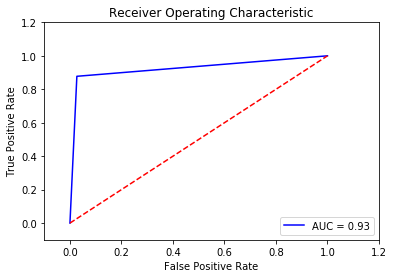

In [32]:
# Plotting the roc curve to get accuracy through logistic regression
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_us)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Feature Selection using Gaussian distribution Model- AUC 74%

In [33]:
# Carrying out feature selection to select the best features that affect the accuracy and drop the rest of the columns
features = ['V%d' % number for number in range(1, 29)]
target = 'Class'

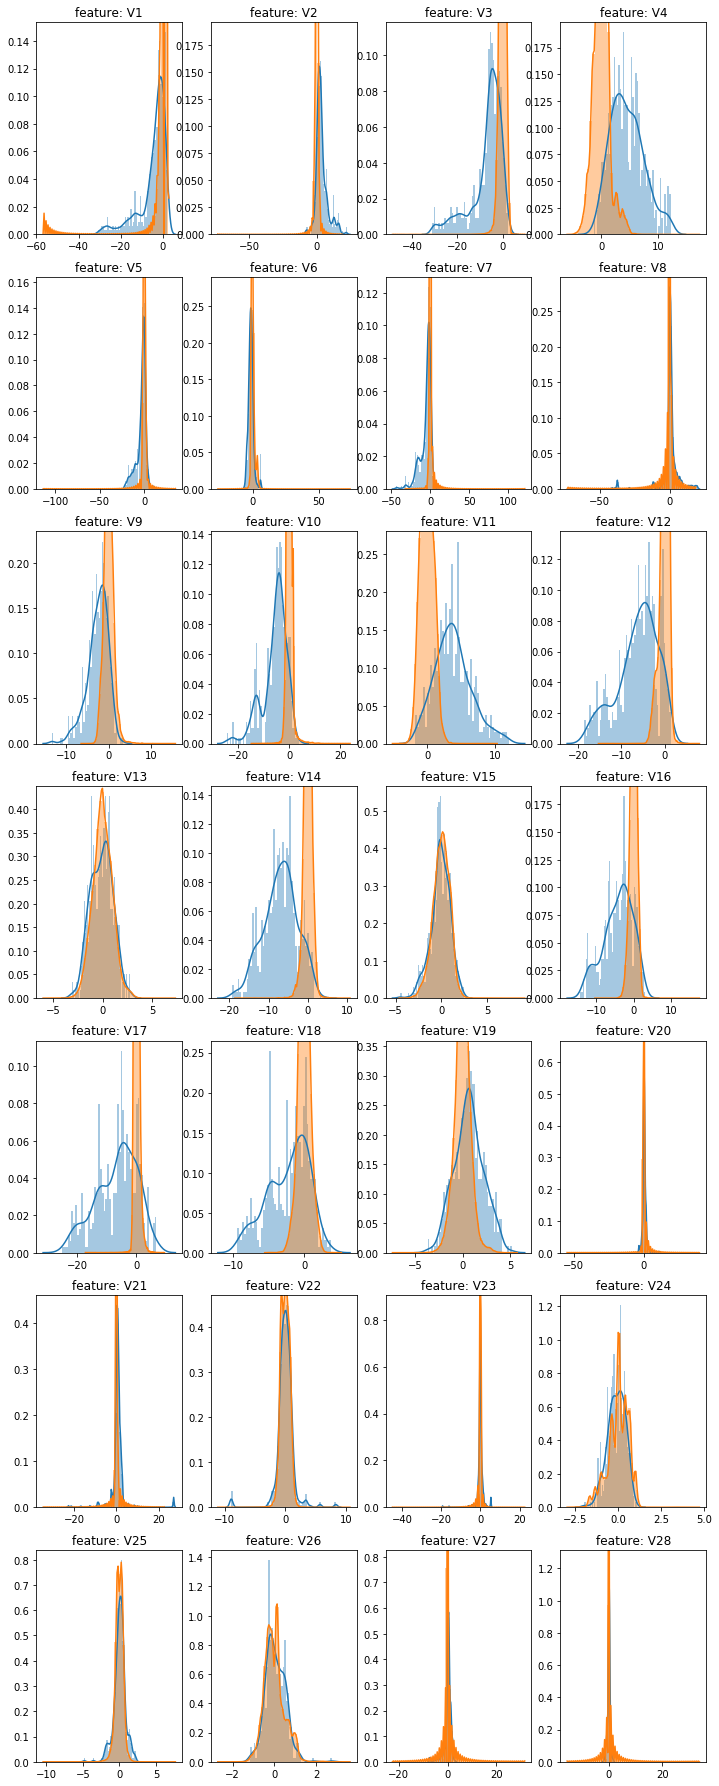

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec
%matplotlib inline

v_features = data.iloc[:,1:29].columns

plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [35]:
# Removing features which  do not align well with the gaussian curve
# Also amount and time are not used for fitting the model
X = np.matrix(data[features].drop(['V28','V27','V21','V23','V8','V20','V5','V6'], axis =1))
y = np.matrix(data[target])
X.shape


(284807, 20)

In [36]:
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = np.matrix(data[features])
y = np.matrix(data[target])

y=np.squeeze(np.asarray(y))

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
def normalize(X):

    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    X -= X.min(axis=0)
    X /= (X.max(axis=0)-X.min(axis=0))

    # for feature in X.columns:
    #     X[feature] -= X[feature].mean()
    #     X[feature] /= X[feature].std()

    return X

In [38]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(y,n_iter=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter:
    # Select the train and test data
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [39]:
# And finally: show the results
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.86      0.47      0.61       246

avg / total       1.00      1.00      1.00    142404



In [40]:
print(confusion_matrix(y_test,y_pred))

[[142139     19]
 [   130    116]]


In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_lr_us = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_us)

0.735705530672


Text(0.5,0,'False Positive Rate')

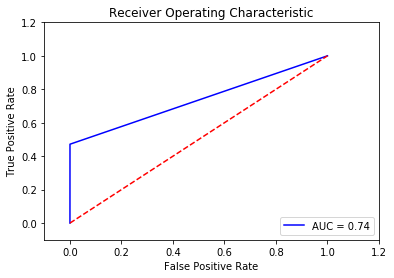

In [42]:
# Plotting the roc curve to get accuracy through logistic regression
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_us)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Logistic Regression on scaled data(Time,Amount), accuracy received 99%
### Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
Summary:
Scaled amount and scaled time are the columns with scaled values.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [43]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [44]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [45]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[df['Class'] == 1]
non_fraud_df = data.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
42741,1.482172,-1.128428,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,...,-0.645394,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1
303,-0.301294,-1.991992,1.201989,-0.034452,0.696628,0.956746,-0.005827,1.095223,-0.574524,0.243435,...,-0.031041,-0.109658,-0.011904,-0.166958,-1.295060,0.570793,-0.296854,0.094955,0.024008,0
263877,-0.351710,1.396986,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,...,-0.004301,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,1
12369,-0.349231,-1.540426,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,...,1.007703,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1
191,0.308654,-1.993951,0.853908,-0.527164,0.823846,1.235224,-0.642370,0.528598,-0.397823,0.156764,...,0.213582,0.222966,0.526012,-0.271286,-0.384842,0.466662,-0.216340,0.058693,0.056363,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


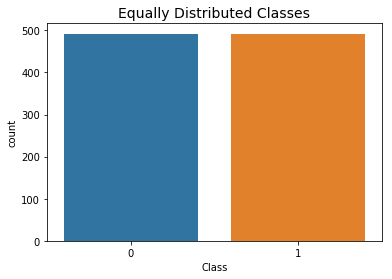

In [46]:
# Divide class column into equal number of fraud and non fraud transactions
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [47]:
new_df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [48]:
X1 = new_df[['scaled_amount', 'scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
Y2 = new_df['Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y2,test_size=0.30,random_state=101)

In [50]:
#Logistic Regresion


logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print(classification_report(y_test,predictR))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       156
          1       0.99      0.96      0.97       140

avg / total       0.98      0.98      0.98       296



In [51]:
print(confusion_matrix(y_test,predictR))

[[155   1]
 [  6 134]]


In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictR)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.975366300366


Text(0.5,0,'False Positive Rate')

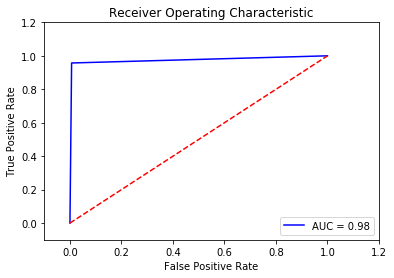

In [53]:
# Plotting the roc curve to get accuracy through logistic regression
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Clustering with t-SNE (t - Stochastic Neighbor Embedding)

Summary:
t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario
This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

In [54]:
from sklearn.manifold import TSNE
import time

# Determining Clusters through PCA
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Implementing PCA
t0 = time.time()
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 4.3e+01 s


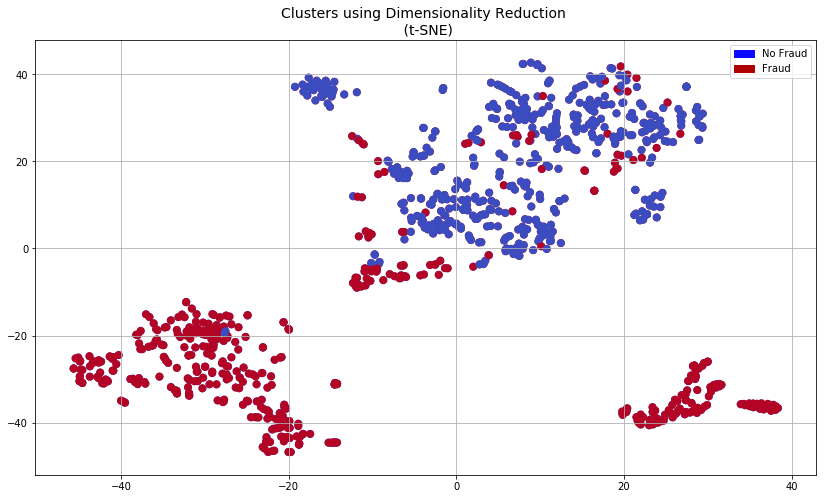

In [55]:
import matplotlib.patches as mpatches


fig = plt.figure(figsize=(14,8))
labels = ['No Fraud', 'Fraud']


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


plt.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)

plt.title('Clusters using Dimensionality Reduction \n (t-SNE)', fontsize=14)

plt.grid(True)

plt.legend(handles=[blue_patch, red_patch])

plt.show()

## Different classifiers to determine which has higher accuracy

In [56]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [57]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [58]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score
Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [59]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.5, 0.7, 0.9, 1]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [60]:
from sklearn.model_selection import cross_val_score

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.24%
Knears Neighbors Cross Validation Score 94.92%
Support Vector Classifier Cross Validation Score 99.49%
DecisionTree Classifier Cross Validation Score 99.87%


In [61]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
       
  

In [ ]:
 # Second Estimator (Knears Neighbors)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


In [ ]:
 # Third Estimator(Support Vector)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    

In [ ]:
 
    # Fourth Estimator(Decision Tree)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Shreya\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

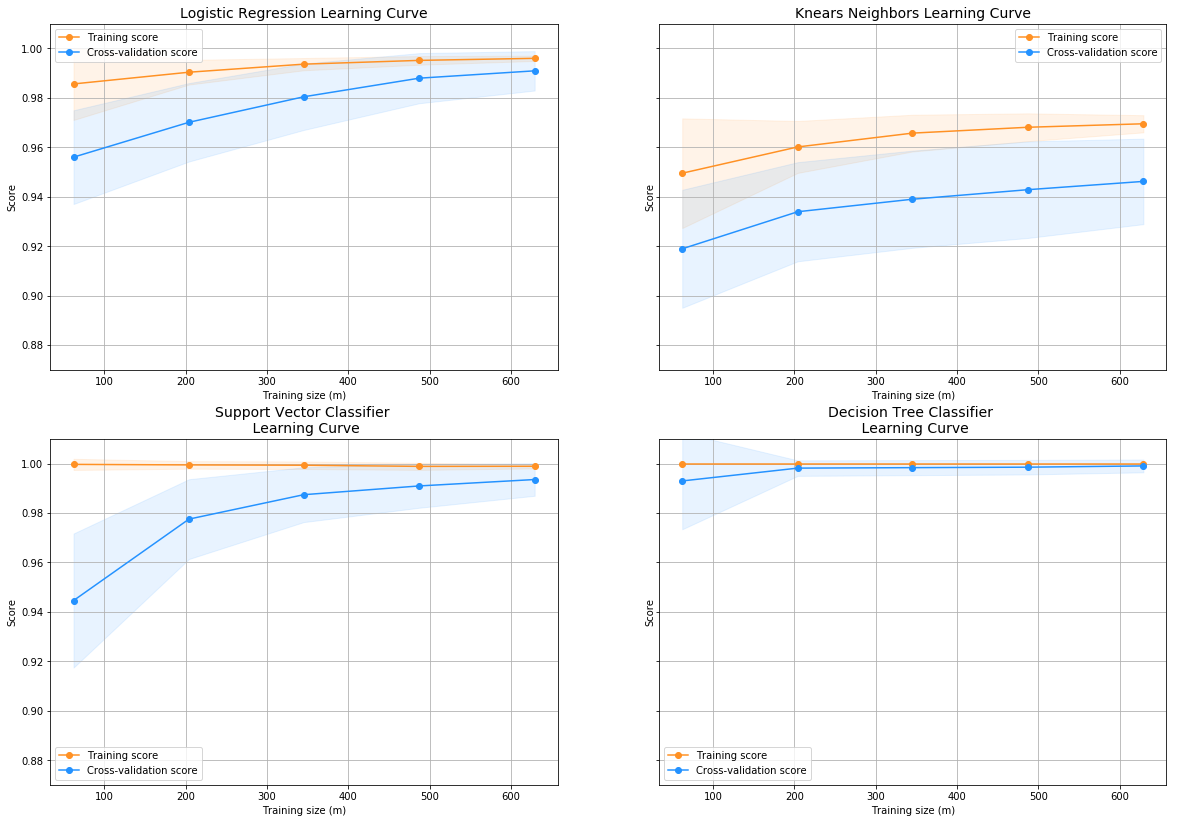

In [62]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [63]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [64]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.999877260982
KNears Neighbors:  0.949664082687
Support Vector Classifier:  0.999954780362
Decision Tree Classifier:  0.99875


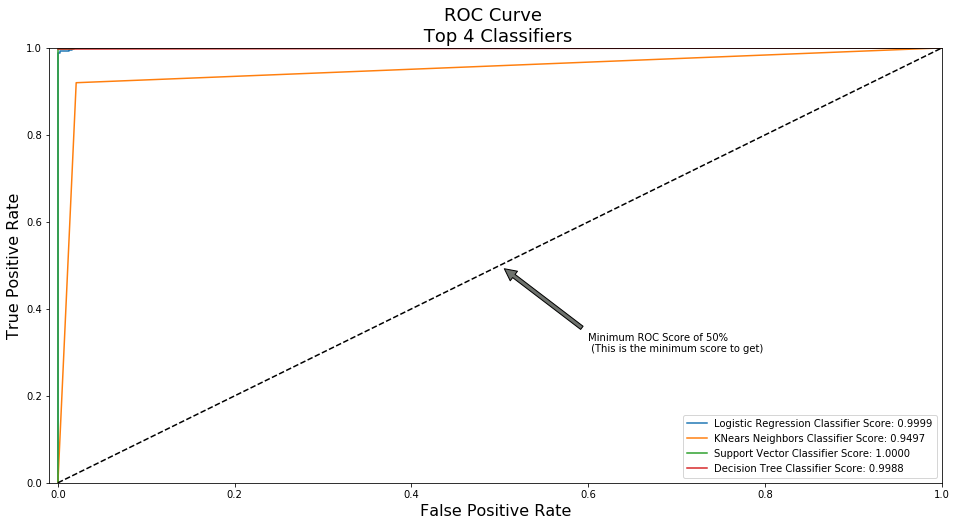

In [65]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

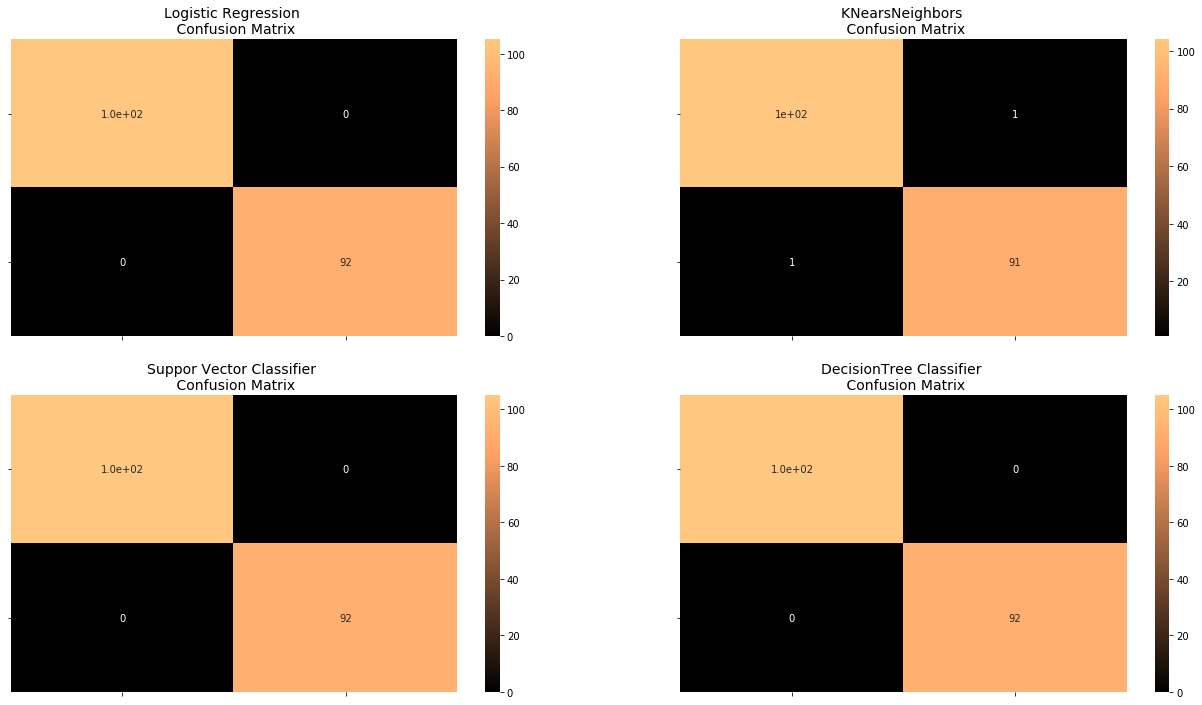

In [66]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [67]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       105
          1       1.00      1.00      1.00        92

avg / total       1.00      1.00      1.00       197

KNears Neighbors:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       105
          1       0.99      0.99      0.99        92

avg / total       0.99      0.99      0.99       197

Support Vector Classifier:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       105
          1       1.00      1.00      1.00        92

avg / total       1.00      1.00      1.00       197

Decision Tree Classifier:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       105
          1       1.00      1.00      1.00        92

avg / total       1.00      1.00      1.00       197



In [68]:
# Final Score in the test set of Logistic Regression
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Neural Network Model

In [69]:
import tensorflow as tf


# Reset the graph for Tensorboard in case we use more neural networks
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
    
reset_graph()
# Variables
n_inputs = X_train.shape[1]
hidden_layer1 = 15
hidden_layer2 = 15
n_outputs = 2

# Placeholders
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# Construct the activation function
# Structure of the Neural Network
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, hidden_layer1, name="hidden1",
                             activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, hidden_layer2, name="hidden2",
                             activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
    
# Loss Function
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    loss = tf.reduce_mean(xentropy)
    
# Gradient Descent
learning_rate = 0.05
with tf.name_scope("gradient"):
    optimization = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
# Evaluation 
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    
# init and saver
init = tf.global_variables_initializer()

In [70]:
amnt_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    
    for epoch in range(amnt_epochs):
        epoch_loss = 0
        i=0
        while i < len(X_train):
            start = i
            end = i+batch_size
            batch_x = np.array(X_train[start:end])
            batch_y = np.array(y_train[start:end])

            _, c = sess.run([optimization, loss], feed_dict={X: batch_x,
                                              y: batch_y})
            epoch_loss += c
            i+=batch_size
        acc_train = accuracy.eval(feed_dict={X: batch_x, y: batch_y})
        acc_test = accuracy.eval(feed_dict={X: X_test, y:y_test})

        print(epoch+1, 'Train accuracy: ', acc_train, 'Test accuracy: ', acc_test, 'Loss: ', epoch_loss)

1 Train accuracy:  0.972973 Test accuracy:  0.923858 Loss:  7.36239144206
2 Train accuracy:  1.0 Test accuracy:  0.944162 Loss:  4.56161469221
3 Train accuracy:  1.0 Test accuracy:  0.944162 Loss:  3.7386212945
4 Train accuracy:  1.0 Test accuracy:  0.954315 Loss:  3.14696032554
5 Train accuracy:  1.0 Test accuracy:  0.959391 Loss:  2.71210333705
6 Train accuracy:  1.0 Test accuracy:  0.979695 Loss:  2.39771961607
7 Train accuracy:  1.0 Test accuracy:  0.979695 Loss:  2.15854364075
8 Train accuracy:  1.0 Test accuracy:  0.979695 Loss:  1.97316225618
9 Train accuracy:  1.0 Test accuracy:  0.984772 Loss:  1.82043219917
10 Train accuracy:  1.0 Test accuracy:  0.984772 Loss:  1.6945521608


## Best Classifier - Logistic Regression- Accuracy 99%

### References
The code in the document by GeorgeZoto- https://www.kaggle.com/georgezoto/credit-card-fraud-detection/code
is licensed under the http://www.apache.org/licenses/ Apache 2.0 open source license


The code in the document by LiangliangYang- https://www.kaggle.com/lighterkey
is licensed under the http://www.apache.org/licenses/ Apache 2.0 open source license